<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission

## Part 1: Exploratory Data Analysis (EDA) [8% of final grade]

#### Section: G4
#### Team: Group 5
#### Members:
1. Chew Hui Feng
2. Eric Ng Yong Wei
3. Colin Teo Jun Wei
4. Tan Li Yang Samuel
5. Martin Ong Yan Jie

#### Dataset: 
credit.csv

### Importing libraries

In [1]:
# General libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt

In [2]:
# Loading dataset

df = pd.read_csv('Data Files\credit.csv', index_col=0) 
pd.set_option('display.max_columns', None)

### 1.1 Overview of dataset [15% of Part I]

In this section, we will be describing the data we have. 
We will be looking at what kind of data we are using, how they are stored and any other information tha helps in knowing more about the dataset.
This will aid us in understanding and exploring the data set

#### 1.1.1 Summarise the background of the dataset [limited to 50 words]

The dataset mainly specifies various information about applicants for a credit facility in a bank. The information also includes the approval status of each applicant which can be useful to train AI models in the future to filter new applicants of the credit facility

#### 1.1.2 State the size of the dataset

In [3]:
rows, columns = df.shape
print(f"The number of rows: {rows}")
print(f"The number of columns (without including the ID column): {columns}")

The number of rows: 1000
The number of columns (without including the ID column): 22


#### 1.1.3 For each variable, describe what it represents and its data type (numerical or categorical)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Checking_Account  1000 non-null   int64  
 1   Duration          1000 non-null   int64  
 2   Payment_Status    1000 non-null   int64  
 3   Purpose           1000 non-null   int64  
 4   Amount            1000 non-null   int64  
 5   Savings_Account   1000 non-null   int64  
 6   Employment        1000 non-null   int64  
 7   Installment       1000 non-null   int64  
 8   Personal_Status   1000 non-null   int64  
 9   Guarantors        1000 non-null   int64  
 10  Residence_Length  966 non-null    float64
 11  Assets            1000 non-null   int64  
 12  Age               1000 non-null   int64  
 13  Credit_Rating     1000 non-null   int64  
 14  Existing_Credits  1000 non-null   int64  
 15  Housing_Type      1000 non-null   int64  
 16  Num_Credits       969 non-null    float64


- ID (Categorical): Represents the identification number for every single row
- Checking_Account (Categorical): Represents the balance of the checking account into 4 different categories
    - 1: Balance is zero
    - 2: Balance is less than $200
    - 3: Balance is more than or equals to $200
    - 4: The user has no checking account
- Duration (Numerical): Represents the duration the borrower would like to borrow the money
- Payment Status (Categorical): Represents the credit history of the borrower into 4 different categories
    - 0: Borrower has not taken any credits before
    - 1: Borrower has all the credits paid back
    - 2: Borrower has existing credits and has paid back till now
    - 3: Borrower has delay in paying off in the past
    - 4: Borrower has a bad credit history (critical account)
- Purpose (Categorical): Represents the reason of borrowing
    - 0: Purchase/Rental of a new car
    - 1: Purchase/Rental of a new car
    - 2: Purchase of furniture/equipment
    - 3: Purchase of radio/television
    - 4: Purchase of domestic appliances
    - 5: For restoration and repair of items/assets
    - 6: For education purposes
    - 7: For vacation
    - 8: For learning new skills (retraining)
    - 9: For funding of business
    - 10: Miscellaneous
- Amount (Numerical): Amount to borrow
- Savings_Account (Categorical): Amount of savings available in savings account
    - 1: Less than $100
    - 2: In the range of $100-$500
    - 3: In the range of $500-$1000
    - 4: More than $3000
    - 5: Amount not known / No savings account
- Employment (Categorical): Length of current employment
    - 1: Unemployed
    - 2: Less than a year
    - 3: 1-4 years
    - 4: 4-7 years
    - 5: More than 7 years
- Installment (Numerical): Installment rate as percentage of disposable income
- Personal_Status (Categorical): Marital status and sex
    - 1: Divorced/Separated males
    - 2: Single males
    - 3: Married/Widowed males
    - 4: Females of any status
- Guarantors (Categorical): Other borrowers that co-apply for the credit or other guarantors of the credit request
    - 1: No other borrowers or co-applicant
    - 2: Has co-applicant
    - 3: Has guarantor
- Residence_Length (Categorical): Number of years staying in current residence
    - 1: Less than a year
    - 2: 1-2 years
    - 3: 2-3 years
    - 4: More than 3 years
- Assets (Categorical): Ownership of assets
    - 1: Owns real estate
    - 2: Does not owns real estate but owns savings agreement/life insurance
    - 3: Does not owns real estate and savings agreement/life insurance but owns a car or other assets
    - 4: Ownership of assets unknown or do not own any assets
- Age (Numerical): Age of borrower in years
- Credit_Rating (Numerical): Rating of credit score of the borrower in the range of 1 to 100
- Existing_Credits (Categorical): Other existing credit in place
    - 1: Has other credits in bank
    - 2: Has other credits in store
    - 3: No other credits
- Housing_Type (Categorical): Type of ownership of the apartment of stay
    - 1: Rented apartment
    - 2: Owned apartment
    - 3: Free to stay apartment
- Num_Credits (Numerical): Number of existing credits
- Occupation (Categorical): Category of occupation and status of residency
    - 1: Unemployed/ unskilled non-resident
    - 2: Unskilled resident
    - 3: Skilled employee/official of any status of residency 
    - 4: Management/ self-employed of any status of residency
- Dependents (Numerical): Number of dependants
- Telephone (Categorical): Has telephone
    - 1: No telephones
    - 2: Has telephone registered to the borrower
- Foreign_Worker (Categorical): Foreign worker or not
    - 1: Foreign worker
    - 2: Not foreign worker
- Approval (Categorical): Status of loan, the dependent variable
    - 1: Approved
    - 0: Rejected

### 1.2 Data pre-processing [35% of Part I]

In this section, we will be doing data cleansing. Mainly to deal with missing data and outliers.
Every data will then be consistent and in easily readable format to ensure quality of the dataset

1.2.1 For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

1. show number of missing data in general
2. show the columns with missing data
3. show more information on each column (number of missing for each column etc)
4. make assumption and change the NaN to other values (can aid with logic or visualization)

In [60]:
print("Number of missing data in each column: ")
df.isna().sum()

Number of missing data in each column: 


Checking_Account     0
Duration             0
Payment_Status       0
Purpose              0
Amount               0
Savings_Account      0
Employment           0
Installment          0
Personal_Status      0
Guarantors           0
Residence_Length    34
Assets               0
Age                  0
Credit_Rating        0
Existing_Credits     0
Housing_Type         0
Num_Credits         31
Occupation           0
Dependents           0
Telephone            0
Foreign_Worker       0
Approval             0
dtype: int64

As shown in the displayed data, there is a total of 34 missing data in the 'Residence_Length' column and 31 missing data in the 'Num_Credits' column.
Next, we proceed to calculate the percentage of missing data for each of these columns (that have missing data)

In [79]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df [missing_value_df ['percent_missing'] !=0]

,column_name,percent_missing
Residence_Length,Residence_Length,3.4
Num_Credits,Num_Credits,3.1


Values that are missing are those with 'NaN' in the column

#### Example

The following shows an example of data point that contains a missing data for 'Residence_Length' column

In [63]:
# example data point with missing data for 'Residence_Length'
df.loc[[23]]

,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval
ID,,,,,,,,,,,,,,,,,,,,,,
23,4,18,2,3,1126,5,2,4,2,1,NaN,1,21,92,3,1,1.0,3,1,2,1,1


The following shows an example of data point that contains a missing data for 'Num_Credits' column

In [64]:
# example data point with missing data for 'Num_Credits'
df.loc[[88]]

,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval
ID,,,,,,,,,,,,,,,,,,,,,,
88,2,12,3,3,585,1,3,4,4,2,4.0,1,20,73,3,1,NaN,3,1,1,1,1


##### Dealing with 'Num_Credits' missing data

We first start by counting the unique values of 'Num_Credits' to see if there is a clear majority or not

In [4]:
df["Num_Credits"].value_counts()

1.0    615
2.0    321
3.0     27
4.0      6
Name: Num_Credits, dtype: int64

We proceed to understand how does Num_Credits affect the status of approval of the loan

In [92]:
temp = df
temp[['Num_Credits', 'Existing_Credits', 'Approval']]

,Num_Credits,Existing_Credits,Approval
ID,,,
1,2.0,3,0
2,1.0,3,1
3,1.0,3,1
4,1.0,3,0
5,1.0,3,1
...,...,...,...
996,2.0,1,0
997,1.0,1,0
998,2.0,3,1


In [84]:
temp = df[df['Existing_Credits'] == 3]
temp[['Existing_Credits', 'Num_Credits']]

,Existing_Credits,Num_Credits
ID,,
1,3,2.0
2,3,1.0
3,3,1.0
4,3,1.0
5,3,1.0
...,...,...
992,3,2.0
993,3,1.0
994,3,1.0


In [56]:
df.groupby('Num_Credits').size()

Num_Credits
1.0    615
2.0    321
3.0     27
4.0      6
dtype: int64

Based on the description and the existing data provided for this field, we can see that there are no cases where the applicants don't have any existing credits. It is very unlikely in 1000 applicants of credit, there aren't any of them that does not have any credits at the moment. Therefore, it is safe to assume that those rows that don't specify the number of credits they hold were the applicants who do not have any existing credits. As such, it will all be replaced with the numerical value 0, to fit the datatype of the column and indicate applicants with no existing credits

Solution: we will be replacing the 'NaN' values with '0'

In [66]:
df['Num_Credits'] = df['Num_Credits'].fillna(0)
df.groupby('Num_Credits').size()

Num_Credits
0.0     31
1.0    615
2.0    321
3.0     27
4.0      6
dtype: int64

Only 2 out of the 22 columns contains missing data points: 'Residence_Length' and 'Num_Credits'

In [110]:
temp = df[df['Residence_Length'].isna()]
temp[['Residence_Length', 'Age', 'Housing_Type', 'Payment_Status', 'Foreign_Worker', 'Occupation', 'Personal_Status', 'Employment', 'Assets', 'Savings_Account', 'Approval']]

,Residence_Length,Age,Housing_Type,Payment_Status,Foreign_Worker,Occupation,Personal_Status,Employment,Assets,Savings_Account,Approval
ID,,,,,,,,,,,
23,NaN,21,1,2,1,3,2,2,1,5,1
49,NaN,36,3,3,1,3,3,5,4,5,1
73,NaN,27,2,2,1,1,2,1,1,1,0
94,NaN,25,2,0,1,3,3,3,3,1,0
96,NaN,37,2,2,1,3,3,5,2,5,0
113,NaN,33,2,2,1,3,2,3,2,5,0
147,NaN,46,1,2,1,3,1,5,1,1,0
157,NaN,32,2,2,1,3,3,3,3,3,0
161,NaN,22,1,2,1,3,2,2,2,2,0


In [106]:
temp = df[df['Residence_Length'].notna()]
temp = temp[temp['Foreign_Worker'] == 1]
temp[['Residence_Length', 'Purpose', 'Housing_Type', 'Foreign_Worker', 'Occupation', 'Personal_Status', 'Employment', 'Assets', 'Savings_Account', 'Approval']]

,Residence_Length,Purpose,Housing_Type,Foreign_Worker,Occupation,Personal_Status,Employment,Assets,Savings_Account,Approval
ID,,,,,,,,,,
1,4.0,0,1,1,3,2,4,3,1,0
2,2.0,3,2,1,3,4,3,2,1,1
3,3.0,3,2,1,2,3,3,2,1,1
4,4.0,2,2,1,2,1,2,2,1,0
5,2.0,1,2,1,2,3,3,2,5,1
...,...,...,...,...,...,...,...,...,...,...
996,3.0,10,2,1,4,3,3,3,1,0
997,4.0,3,1,1,2,3,4,3,1,0
998,2.0,3,2,1,3,3,3,2,1,1


In [123]:
temp = df[df['Foreign_Worker'] == 1]
temp = temp[temp['Residence_Length'].notna()]
temp['Residence_Length'].mode()

0    4.0
Name: Residence_Length, dtype: float64

In [124]:
temp['Residence_Length'].median()

3.0

In [126]:
temp['Residence_Length'].mean()

2.883745963401507

In [118]:
df[df['Foreign_Worker'] == 1].shape

(963, 22)

(array([125.,   0., 288.,   0.,   0., 145.,   0., 397.,   0.,  11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

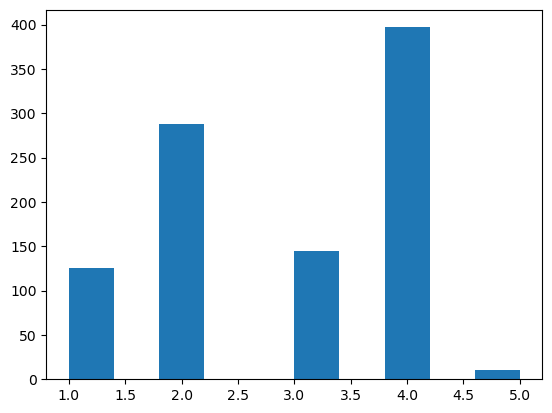

In [131]:
plt.hist(df['Residence_Length'])

In [88]:
temp[['Residence_Length', 'Purpose']].groupby('Purpose').size()

Purpose
0    10
1     2
2     5
3     7
5     2
6     3
9     5
dtype: int64

In [45]:
df['Num_Credits'].describe()

count    1000.000000
mean        1.362000
std         0.619144
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Num_Credits, dtype: float64

In [40]:
df['Num_Credits'] = df['Num_Credits'].fillna(0)

1.2.2 For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Checking_Account  1000 non-null   int64  
 1   Duration          1000 non-null   int64  
 2   Payment_Status    1000 non-null   int64  
 3   Purpose           1000 non-null   int64  
 4   Amount            1000 non-null   int64  
 5   Savings_Account   1000 non-null   int64  
 6   Employment        1000 non-null   int64  
 7   Installment       1000 non-null   int64  
 8   Personal_Status   1000 non-null   int64  
 9   Guarantors        1000 non-null   int64  
 10  Residence_Length  966 non-null    float64
 11  Assets            1000 non-null   int64  
 12  Age               1000 non-null   int64  
 13  Credit_Rating     1000 non-null   int64  
 14  Existing_Credits  1000 non-null   int64  
 15  Housing_Type      1000 non-null   int64  
 16  Num_Credits       969 non-null    float64


'Residence_Length' and 'Num_Credits' are the only two numerical datatype in float datatype. We first study if they contain any non-integer values

In [12]:
print(df['Residence_Length'].value_counts())
df['Num_Credits'].value_counts()

4.0    397
2.0    288
3.0    145
1.0    125
5.0     11
Name: Residence_Length, dtype: int64


1.0    615
2.0    321
3.0     27
4.0      6
Name: Num_Credits, dtype: int64

As shown above, they are both integer numerical values, let's convert them to integer type before we proceed

In [15]:
# Have to ensure the Nan values are handled first
df.Residence_Length = df.Residence_Length.astype(int)
df.Num_Credits = df.Num_Credits.astype(int)

print(df['Residence_Length'].value_counts())
df['Num_Credits'].value_counts()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

**Response.** 

1.2.3 For categorical variables, perform the necessary encoding.

In [36]:

enc = OneHotEncoder(handle_unknown='ignore')


### 1.3	Exploratory analysis and visualization [50% of Part I]

In this section, we will be looking into the data and undestanding it indepth to gain insights that will be helpful.
To aid the exploration of the data we have, we will be using visualization and draw up certain conclusions from the information we have

1.3.1 For each variable, provide relevant summary statistics

**Response.** 

1.3.2 For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

1.3.3 Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 